# <h1><center> Project Title : Customer Segmentation of Online retail store</center></h1>

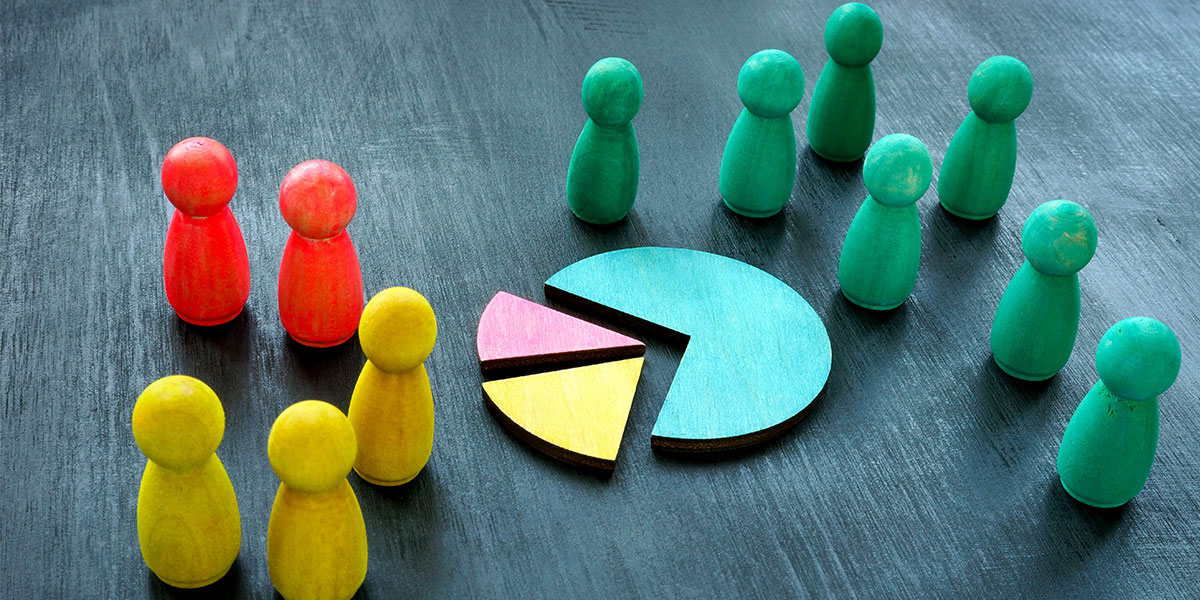

## <b> Problem Description </b>

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2021 and 09/12/2022 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>


* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from numpy import math

In [2]:
# Load The Datset "Retail data"
# The DataFile sometime wont readable due to its containt for encoding do "encoding = ISO-8859-1"
# Use Panda Library To read The CSV file
# .head() helps to read top 5 record of dataset
retail_df=pd.read_csv("Retail data.csv",sep=",",encoding="ISO-8859-1")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2021 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2021 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2021 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2021 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2021 8.26,3.39,17850.0,United Kingdom


## Data Wrangling:

**Check the data properties**

In [3]:
# shape of dataset
retail_df.shape

(541909, 8)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# 1. Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

**Obeservations**
- **Problem 1:** Description, CustomerID has null values.
- **Problem 2:** The data type of **InvoiceNo** is Object which should be **int.**
- **Problem 3:** **Quantity** minimum value is **negetive**
- **Problem 4:** **UnitPrice** is also **negetive**
- **Problem 5:** The data type of **InvoiceDate** is Object which should be **int**.


<ins>**Solution for Problem:1**<ins>

In [7]:
#Let's drop the null values
retail_df.dropna(inplace=True)
retail_df.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [8]:
retail_df.shape

(406829, 8)

<ins>**Solution for Problem:2**<ins>

Now let's change InvoiceNo into int

retail_df["InvoiceNo"] = retail_df["InvoiceNo"].astype(int)

gives an error
ValueError: invalid literal for int() with base 10: 'C536379'

In [9]:
retail_df.loc[retail_df["InvoiceNo"] == 'C536379']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2021 9.41,27.5,14527.0,United Kingdom


In [10]:
#Let's find the values starts with "C"
C_df = retail_df[retail_df["InvoiceNo"].str.startswith('C')]
C_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2021 9.41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2021 9.49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2021 10.24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2021 10.24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2021 10.24,0.29,17548.0,United Kingdom


**It seems that some entries has "C" as initial.**

After looking into data, we found that **C stands for cancellation of the order** and "-" (Minus Sign) in quantity indicates the cancelled quantity 

We can remove this values as it will not contribute for the segmentation but before that let's check its frequency and does it related to same customers

In [11]:
len(C_df["InvoiceNo"])

8905

In [12]:
C_df["CustomerID"].nunique()

1589

**After looking at the differance between calcellation values and unique customers, it does'nt seem a quetion for worry of any loss**

Now we can drop this values

In [13]:
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [14]:
retail_df.shape

(397924, 8)

<ins>**Solution for Problem:3**<ins>

In [15]:
#now minimum quantity should change as we removed the cancelled orders
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Here we can see
minimum quantity is 1 now but

<ins>UnitPrice has 0 as min value<ins>

<ins>**Solution for Problem:4**<ins>

In [16]:
# Because of removing cancelled values we covered negetive unit price as well but we found 0 unit price so lets find out no. of 0 values
len(retail_df[retail_df["UnitPrice"]==0])

40

In [17]:
# lets take the value above 0
retail_df = retail_df[retail_df["UnitPrice"]>0]

In [18]:
retail_df.shape

(397884, 8)

<ins>**Solution for Problem:5**<ins>

In [19]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H.%M")

In [20]:
retail_df["InvoiceDate"].dtype

dtype('<M8[ns]')

In [21]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [22]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [23]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [24]:
# add Total Amount column
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [25]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01 08:26:00,2.55,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,20.34


In [26]:
retail_df.to_csv("wrangled_data.csv", index = False)

# **EDA(Exploratory Data Analysis)**

### Analysis By Country
- Find out which country has the highest sell
  so that marketing can be increased at less expenditure country based on their factors how many countries can be beneficial for       investing

### Analysis By Period
- For understanding which month has better sales and which has less  
  by this we would understand the needs of customers if it's related to a specific period. We can lower the discount on the price in most selling periods and get maximum profit and increase the discount in other seasons so that the sales will increase in less selling season
- We way we can target their needs

### Analysis By Product
- We can analyze most selling products for suggesting them to the customers 

### Analysis By Day
- we can analyze the sales every day of the week to find the most engaging day 
  to avail offers.

### Analysis By Customer ID
- This analysis can help us to find most loyal customers, we can avail some coupons for them.


## Analysis By Country

In [27]:
by_countries = retail_df.groupby('Country').agg({'Country': 'count', 'TotalAmount': 'sum'}).rename(columns={'Country': 'Customer_count'}).reset_index()
by_countries.sort_values("Customer_count", ascending = False, inplace = True)
by_countries.head()

,Country,Customer_count,TotalAmount
35,United Kingdom,354321,7.308392e+06
14,Germany,9040,2.288671e+05
13,France,8341,2.090240e+05
10,EIRE,7236,2.655459e+05
30,Spain,2484,6.157711e+04


In [28]:
#by_countries.sort_values("TotalAmount", ascending = False).head(10)

In [29]:
by_countries.to_csv("by_country.csv", index = False)

**United Kingdom** has **highest customer count.**

To concentrate on other countries let's drop United Kingdom

In [30]:
value_to_drop = "United Kingdom"
index_to_drop = by_countries["Country"] == value_to_drop

# Drop the rows where the value appears
by_countries.drop(by_countries[index_to_drop].index, inplace=True)
by_countries

,Country,Customer_count,TotalAmount
14,Germany,9040,228867.14
13,France,8341,209024.05
10,EIRE,7236,265545.90
30,Spain,2484,61577.11
23,Netherlands,2359,285446.34
3,Belgium,2031,41196.34
32,Switzerland,1841,56443.95
26,Portugal,1462,33439.89
0,Australia,1182,138521.31
24,Norway,1071,36165.44


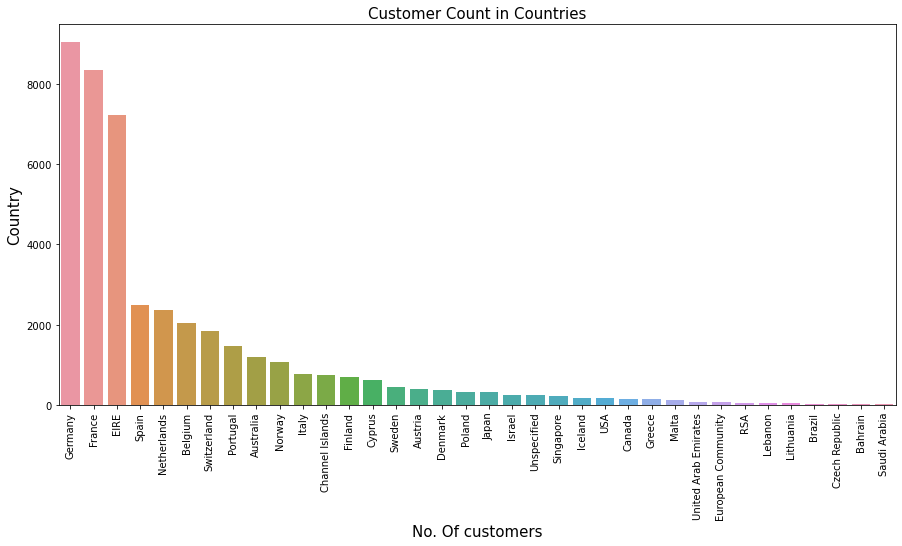

In [31]:
plt.figure(figsize=(15, 7))
sns.barplot(x=by_countries["Country"], y = by_countries["Customer_count"])
plt.title("Customer Count in Countries" , fontsize = 15)
plt.xlabel("No. Of customers", fontsize = 15)
plt.ylabel("Country", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Analysis By Period

In [32]:
monthly_sell = retail_df.groupby("Month").agg({"TotalAmount": "sum"})

monthly_sell.reset_index(inplace=True)
monthly_sell

,Month,TotalAmount
0,April,469200.361
1,August,645343.900
2,December,1090906.680
3,February,447137.350
4,January,569445.040
5,July,600091.011
6,June,661213.690
7,March,595500.760
8,May,678594.560
9,November,1161817.380


In [33]:
monthly_sell['Month'].dtype

dtype('O')

In [34]:
import calendar
monthly_sell["Month"] = pd.to_datetime(monthly_sell["Month"], format="%B").dt.month

# sort by month
monthly_sell.sort_values("Month", inplace=True)

# add a column with the name of the month
monthly_sell["Month Name"] = monthly_sell["Month"].apply(lambda x: calendar.month_name[x])

print(monthly_sell)

    Month  TotalAmount Month Name
4       1   569445.040    January
3       2   447137.350   February
7       3   595500.760      March
0       4   469200.361      April
8       5   678594.560        May
6       6   661213.690       June
5       7   600091.011       July
1       8   645343.900     August
11      9   952838.382  September
10     10  1039318.790    October
9      11  1161817.380   November
2      12  1090906.680   December


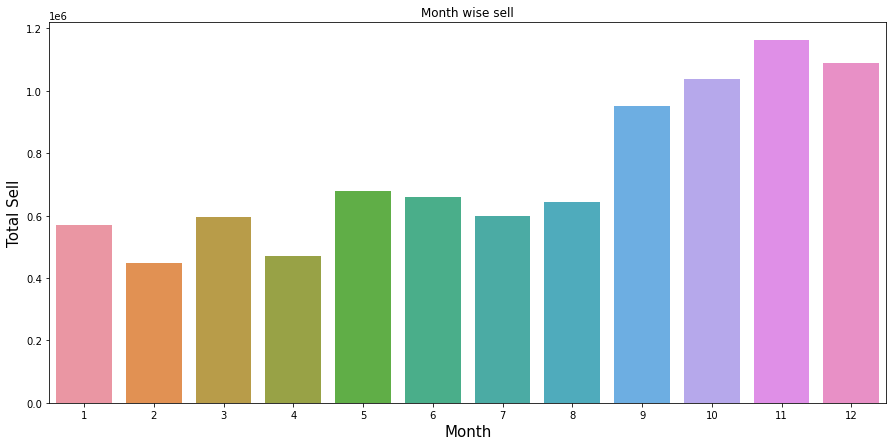

In [35]:
# plot barplot
plt.figure(figsize=(15,7))
sns.barplot(x=monthly_sell["Month"], y = monthly_sell["TotalAmount"])
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Sell", fontsize=15)
plt.title("Month wise sell")
plt.show()

## Analysis By Products

In [36]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01 08:26:00,2.55,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01 08:26:00,2.75,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,20.34


In [37]:
grouped = retail_df.groupby("StockCode").agg({"Description": lambda x: x.value_counts().index[0],
                                              "UnitPrice": lambda x: x.unique()[0],
                                              "TotalAmount": "sum", 
                                              "Quantity": "sum"})
grouped.columns =  ["Product", "UnitPrice", "TotalAmount", "Quantity"]
grouped.reset_index(inplace=True)
grouped.head(10)

,StockCode,Product,UnitPrice,TotalAmount,Quantity
0,10002,INFLATABLE POLITICAL GLOBE,0.85,699.55,823
1,10080,GROOVY CACTUS INFLATABLE,0.85,114.41,291
2,10120,DOGGY RUBBER,0.21,40.53,193
3,10123C,HEARTS WRAPPING TAPE,0.65,3.25,5
4,10124A,SPOTS ON RED BOOKCOVER TAPE,0.42,6.72,16
5,10124G,ARMY CAMO BOOKCOVER TAPE,0.42,7.14,17
6,10125,MINI FUNKY DESIGN TAPES,0.85,930.30,1226
7,10133,COLOURING PENCILS BROWN TUBE,0.85,1143.61,2384
8,10135,COLOURING PENCILS BROWN TUBE,1.25,1786.69,1938
9,11001,ASSTD DESIGN RACING CAR PEN,1.69,1953.00,1252


**Here we can see that their are sub stockcode in the form of alphabate for different veriation of the same product with same value.**

**We can group this value to find most selling product type.**

In [38]:
# loop through the values in the StockCode column and modify them if needed
grouped_stockcode=[]
for i in range(len(grouped["StockCode"])):
    if any(char.isdigit() for char in grouped.loc[i, "StockCode"]):
        grouped.loc[i, "StockCode"] = ''.join(filter(str.isdigit, grouped.loc[i, "StockCode"]))
    grouped_stockcode.append(grouped.loc[i, "StockCode"])

# replace the StockCode column with the modified values
grouped["StockCode"] = grouped_stockcode

# display the result
grouped.head(10)

,StockCode,Product,UnitPrice,TotalAmount,Quantity
0,10002,INFLATABLE POLITICAL GLOBE,0.85,699.55,823
1,10080,GROOVY CACTUS INFLATABLE,0.85,114.41,291
2,10120,DOGGY RUBBER,0.21,40.53,193
3,10123,HEARTS WRAPPING TAPE,0.65,3.25,5
4,10124,SPOTS ON RED BOOKCOVER TAPE,0.42,6.72,16
5,10124,ARMY CAMO BOOKCOVER TAPE,0.42,7.14,17
6,10125,MINI FUNKY DESIGN TAPES,0.85,930.30,1226
7,10133,COLOURING PENCILS BROWN TUBE,0.85,1143.61,2384
8,10135,COLOURING PENCILS BROWN TUBE,1.25,1786.69,1938
9,11001,ASSTD DESIGN RACING CAR PEN,1.69,1953.00,1252


In [39]:
grouped = grouped.groupby("StockCode").agg({"Product": lambda x: x.value_counts().index[0],
                                              "UnitPrice": lambda x: x.unique()[0],
                                              "TotalAmount": "sum", 
                                              "Quantity": "sum"})
grouped.columns =  ["Product", "UnitPrice", "TotalAmount", "Quantity"]
grouped.reset_index(inplace=True)
grouped.sort_values("TotalAmount", ascending = False, inplace = True)
grouped.head(10)

,StockCode,Product,UnitPrice,TotalAmount,Quantity
2368,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08,168469.60,80995
1257,22423,REGENCY CAKESTAND 3 TIER,10.95,142592.95,12402
2959,85099,JUMBO BAG BAROQUE BLACK WHITE,1.65,139540.02,75781
2969,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55,100603.50,36782
1966,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,81416.73,77916
2510,47566,TEA TIME PARTY BUNTING,4.65,79289.58,17582
3198,POST,POSTAGE,18.00,77803.96,3120
2909,84997,CHILDRENS CUTLERY RETROSPOT RED,3.75,57628.84,15176
2858,84879,ASSORTED COLOUR BIRD ORNAMENT,1.69,56580.34,35362
3196,M,Manual,1.25,53779.93,7173


In [40]:
len(grouped)

3199

In [41]:
grouped.to_csv("Refined_data.csv", index = True)

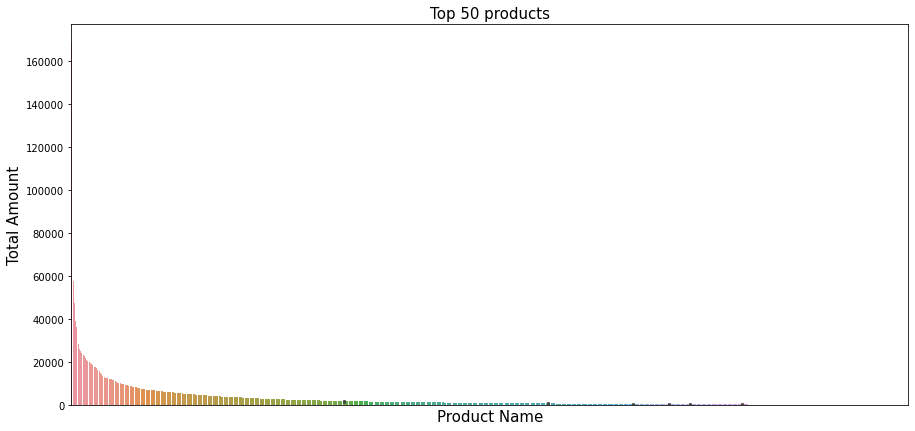

In [42]:
plt.figure(figsize=(15,7))
sns.barplot(y=grouped['TotalAmount'],x=grouped['Product'])
plt.ylabel("Total Amount", fontsize =15)
plt.xlabel("Product Name", fontsize =15)
plt.title('Top 50 products', fontsize =15)
plt.xticks([])
plt.show()

In [43]:
grouped.sort_values("TotalAmount", ascending = False, inplace = True)

In [44]:
top_25_product = grouped.head(25)

In [45]:
top_25_product

,StockCode,Product,UnitPrice,TotalAmount,Quantity
2368,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08,168469.60,80995
1257,22423,REGENCY CAKESTAND 3 TIER,10.95,142592.95,12402
2959,85099,JUMBO BAG BAROQUE BLACK WHITE,1.65,139540.02,75781
2969,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55,100603.50,36782
1966,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,81416.73,77916
2510,47566,TEA TIME PARTY BUNTING,4.65,79289.58,17582
3198,POST,POSTAGE,18.00,77803.96,3120
2909,84997,CHILDRENS CUTLERY RETROSPOT RED,3.75,57628.84,15176
2858,84879,ASSORTED COLOUR BIRD ORNAMENT,1.69,56580.34,35362
3196,M,Manual,1.25,53779.93,7173


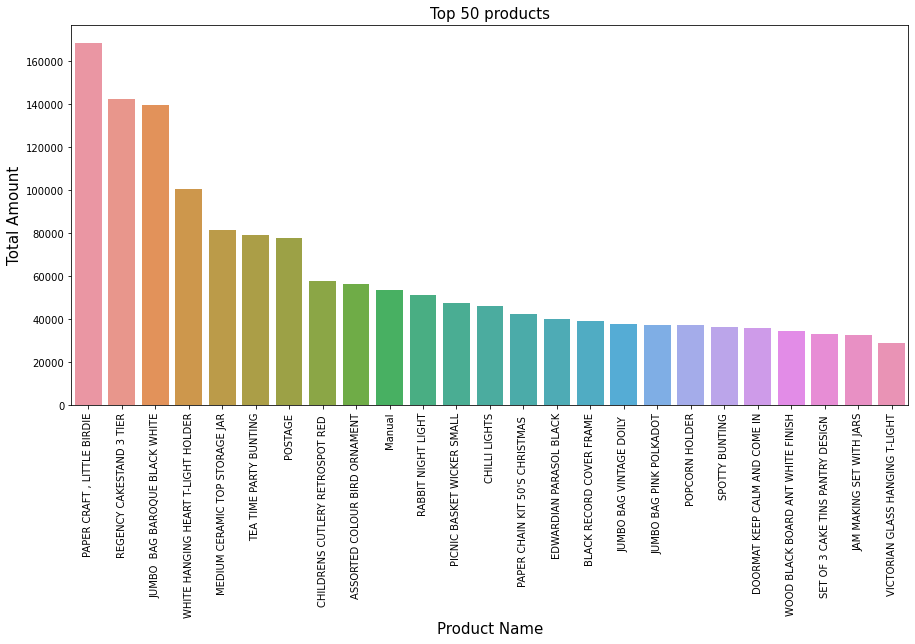

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(y=top_25_product['TotalAmount'],x=top_25_product['Product'])
plt.ylabel("Total Amount", fontsize =15)
plt.xlabel("Product Name", fontsize =15)
plt.title('Top 50 products', fontsize =15)
plt.xticks(rotation=90)
plt.show()

## Analysis By Day

In [47]:
sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


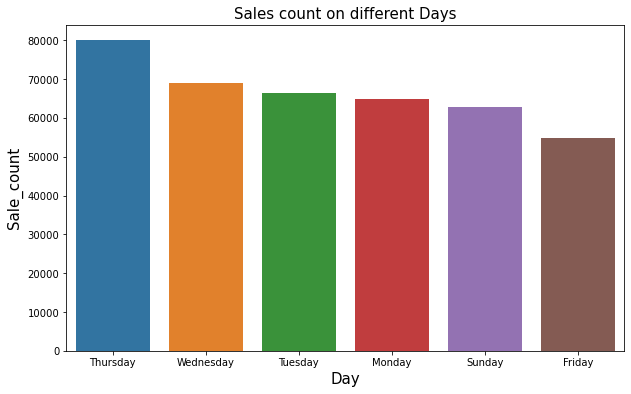

In [48]:
# Sales count on different days.
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days', fontsize =15)
plt.xlabel("Day", fontsize =15)
plt.ylabel("Sale_count", fontsize =15)
plt.show()

## Analysis By Customer ID

In [49]:
avg_amount=retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)

Text(0.5, 1.0, 'Average amount spent by each Customer')

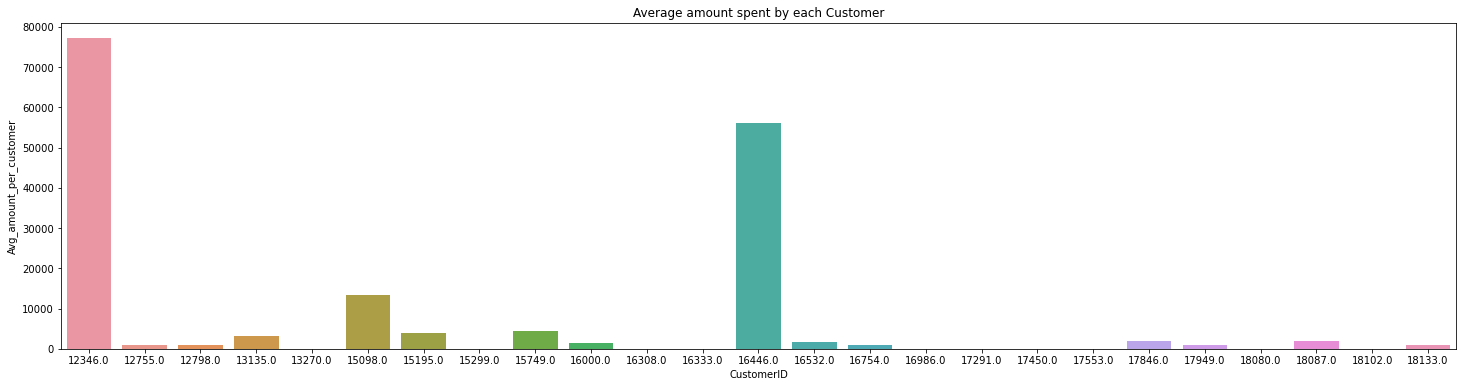

In [50]:
# Sales count on different days.
plt.figure(figsize=(25,6))
sns.barplot(x=avg_amount['CustomerID'].head(25),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')

# <h1><center> Model Building</center></h1>

## RFM Model Analysis:

### **What is RFM?**

* RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.

* RECENCY: How recently did the customer visit our website or how recently did a customer purchase?

* Frequency: How often do they visit or how often do they purchase?***

* Monetary: How much revenue we get from their visit or how much do they spend when they purchase?

### **Why it is Needed?**
- RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.

- The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

In [51]:
rfm_dataframe=retail_df.copy()

In [52]:
rfm_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01 08:26:00,2.55,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01 08:26:00,2.75,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,8,26,December,Wednesday,20.34


In [53]:
#Recency = Latest Date - Last Inovice Data
#Frequency = count of invoice no. of transaction(s), 
#Monetary = Sum of TotalAmount for each customer

In [54]:
import datetime as dt

#Set Latest date 2022-12-10 as last invoice date was 2022-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2022,12,10)

#Create RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [55]:
# Descriptive Stats= Recency
rfm_dataframe.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

In [56]:
import warnings
warnings.filterwarnings('ignore')
from numpy import math

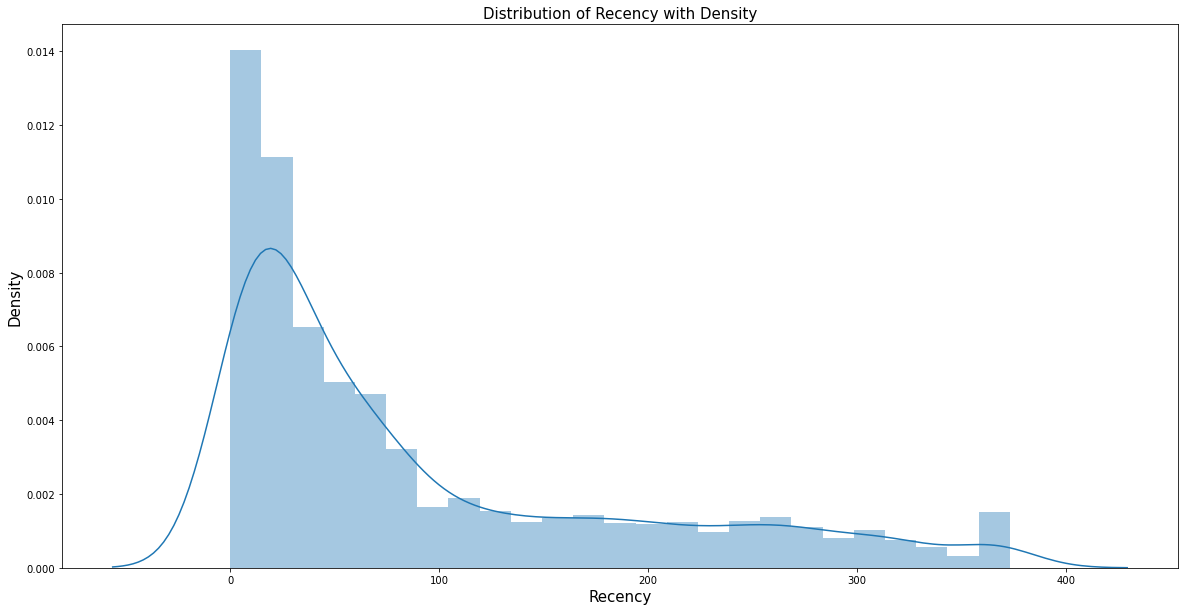

In [57]:
plt.figure(figsize=(20,10))
sns.distplot(x=rfm_dataframe['Recency'])
plt.xlabel('Recency', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Recency with Density', fontsize = 15);

**Distribution of Recency is right skewed.**
- Count of number of customers purchasing again within 100 days is pretty high.

In [58]:
# Descriptive Stats= Frequency
rfm_dataframe['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

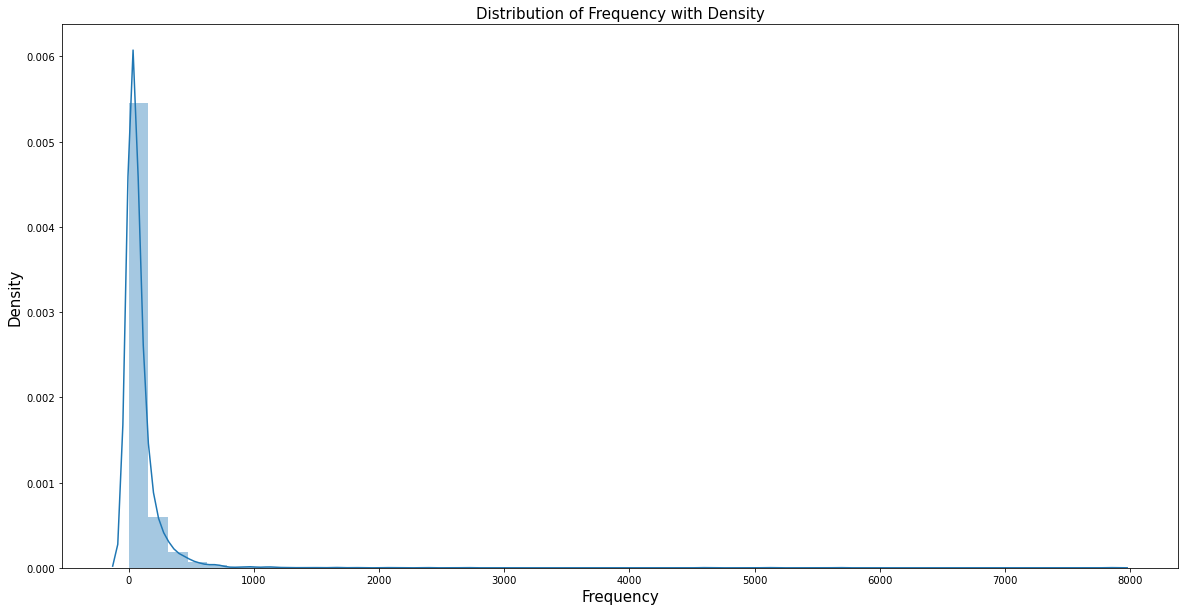

In [59]:
plt.figure(figsize=(20,10))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Frequency with Density', fontsize = 15);

**Visualization suggest that the "Frequency" variable is highly skewed and has a long-tailed distribution.**
- Here we can see 75% customers are purchasing 100 or less times in a year.

In [60]:
# Descriptive Stats= Monetary
rfm_dataframe['Monetary'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

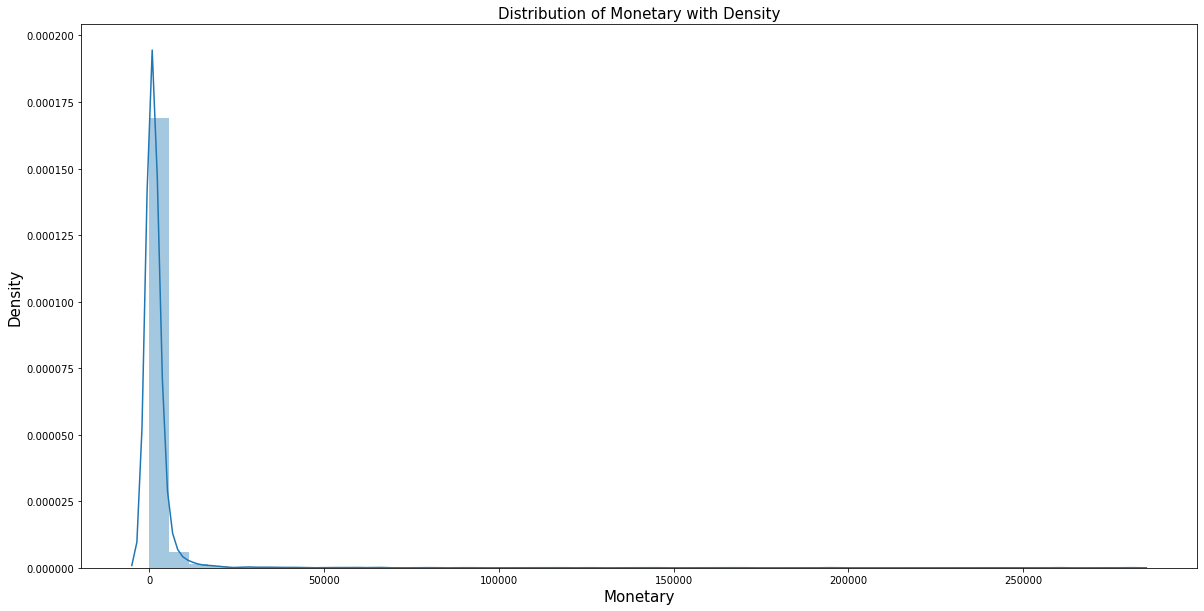

In [61]:
plt.figure(figsize=(20,10))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.xlabel('Monetary', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Monetary with Density', fontsize = 15);

**Distribution of Monetary is highly right skewed.**

In [62]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])

In [63]:
#Converting quantiles to a dictionary, easier to use.
quantile = quantile.to_dict()

In [64]:
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [65]:
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [66]:
# For showing R,F,M segment values, calculate and add R,F and M segments values columns in the dataset.
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [67]:
# Combine RFM score in a new column
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [68]:
# to show total sum of RFMGroup values calculate and add RFMScore value column
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [69]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int32  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 288.1+ KB


In [70]:
# To each customer assign Loyelty Level 
loyalty_lvl = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=loyalty_lvl)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinaum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinaum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz


In [71]:
#lets find see the unique values
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10], dtype=int64)

In [72]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinaum
4,14156.0,9,1400,117379.63,1,1,1,111,3,Platinaum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinaum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinaum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinaum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinaum
9,15311.0,0,2379,60767.90,1,1,1,111,3,Platinaum


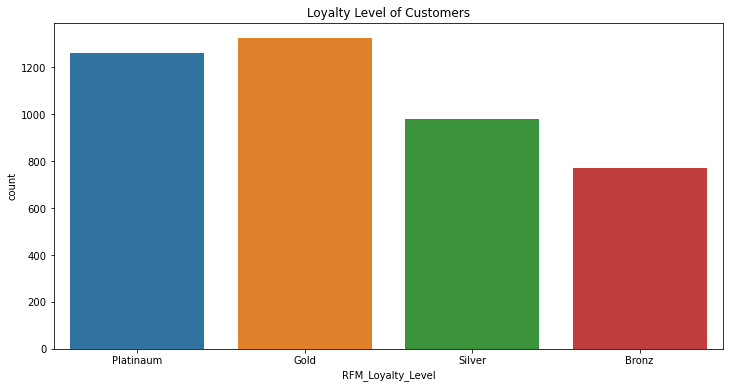

In [73]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [74]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinaum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinaum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinaum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinaum
4,12415.0,24,714,124914.53,2,1,1,211,4,Platinaum
5,14156.0,9,1400,117379.63,1,1,1,111,3,Platinaum
6,17511.0,2,963,91062.38,1,1,1,111,3,Platinaum
7,16029.0,38,242,81024.84,2,1,1,211,4,Platinaum
8,16684.0,4,277,66653.56,1,1,1,111,3,Platinaum
9,14096.0,4,5111,65164.79,1,1,1,111,3,Platinaum


In [75]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [76]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           19.412510   0  140  228.559778  20  7847  5255.277617   
Gold                63.376133   0  372   57.959970   1   543  1169.031202   
Silver             126.029562   1  373   24.503568   1    99   583.936944   
Bronz              217.261039  51  373   10.955844   1    41   199.159506   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          360.93  280206.02  1263  
Gold               114.34  168472.50  1324  
Silver               6.90   77183.60   981  
Bronz                3.75     660.00   770

In [77]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

In [78]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

### Now let's Visualize the Distribution of Recency,Frequency and Monetary.

**Distribution of Recency**

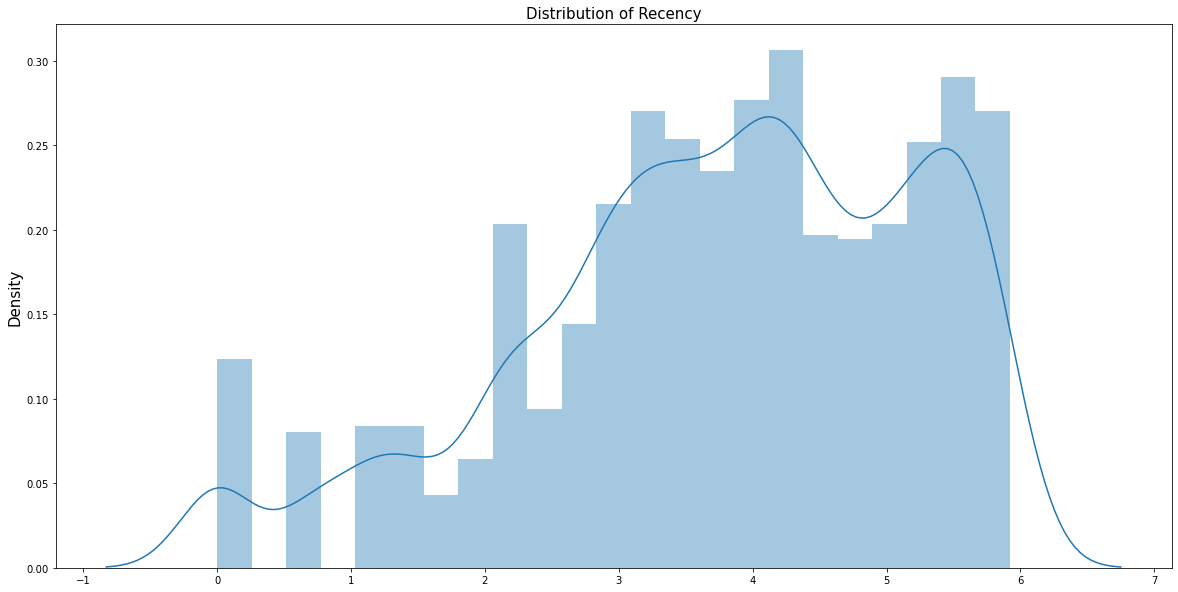

In [79]:
plt.figure(figsize=(20,10))
sns.distplot(x=Log_rfm_df['Recency'])
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Recency', fontsize=15);

**Distribution of Frequency**

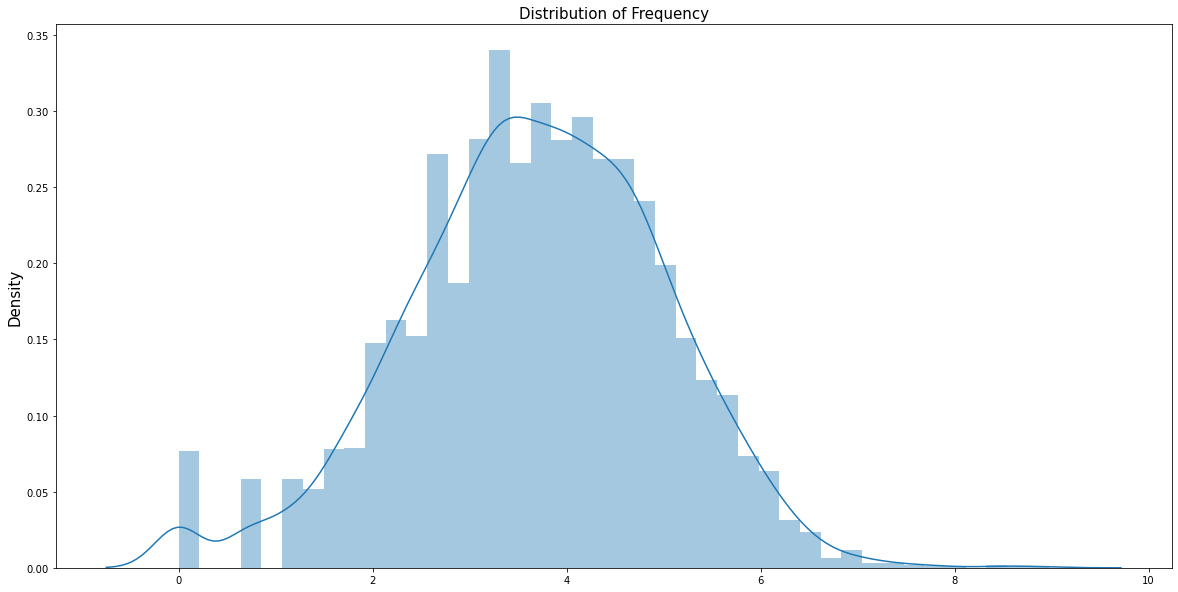

In [80]:
plt.figure(figsize=(20,10))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Frequency', fontsize = 15);

**Distribution of Frequency**

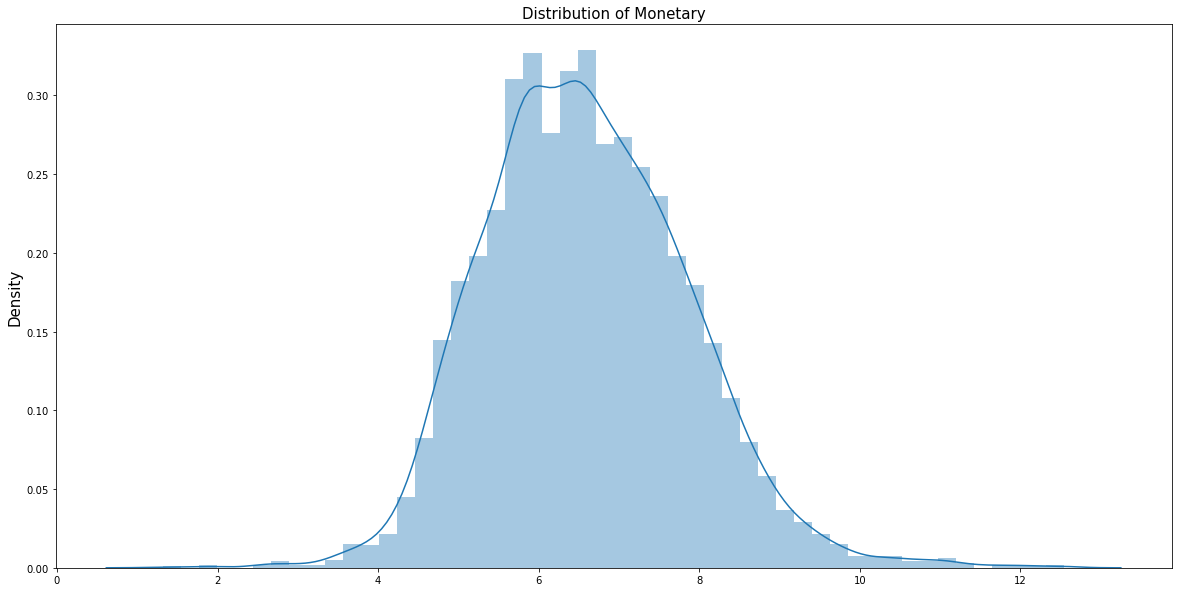

In [81]:
plt.figure(figsize=(20,10))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Monetary', fontsize = 15);

In [82]:
#transform normalised data into columns
rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [83]:
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,Platinaum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338


# **1) KMeans Clustering:**

In [84]:
#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [85]:
!pip install yellowbrick

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

### Recency and Monetary.

**A)  Applying Elbow Method on Recency and Monetary.**

In [86]:
import warnings
warnings.filterwarnings('ignore')
from numpy import math

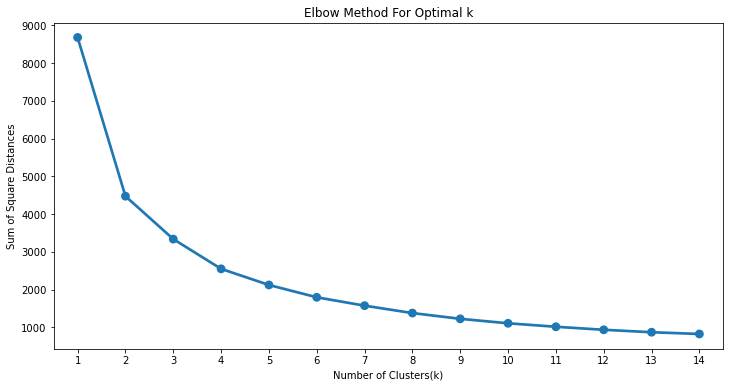

In [87]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Here we can see that Optimal value for cluster came out to be 2.**

### Cross verifying with ElbowVisualizar
The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

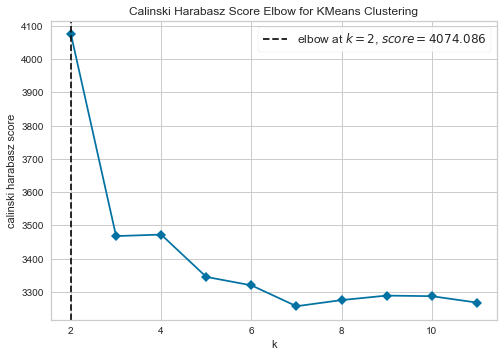

In [88]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

Elbow Visulaizer also giving cluster=2

**Silhouette Score**

(Validating Above optimal cluster value(i.e optimal_cluster=2)

In [89]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.421461308316105
For n_clusters = 3, silhouette score is 0.3433470120059089
For n_clusters = 4, silhouette score is 0.3649058771514865
For n_clusters = 5, silhouette score is 0.3395250404488943
For n_clusters = 6, silhouette score is 0.3422201212043055
For n_clusters = 7, silhouette score is 0.34787086356830993
For n_clusters = 8, silhouette score is 0.33774535264866695
For n_clusters = 9, silhouette score is 0.3459604789419575
For n_clusters = 10, silhouette score is 0.3479066146663346
For n_clusters = 11, silhouette score is 0.33753966718471434
For n_clusters = 12, silhouette score is 0.3427273975494072
For n_clusters = 13, silhouette score is 0.34235758342627326
For n_clusters = 14, silhouette score is 0.3376357432302628
For n_clusters = 15, silhouette score is 0.33730368894983076


**Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)**

For n_clusters = 2 The average silhouette_score is : 0.421461308316105
For n_clusters = 3 The average silhouette_score is : 0.3433470120059089
For n_clusters = 4 The average silhouette_score is : 0.3649058771514865
For n_clusters = 5 The average silhouette_score is : 0.3395250404488943


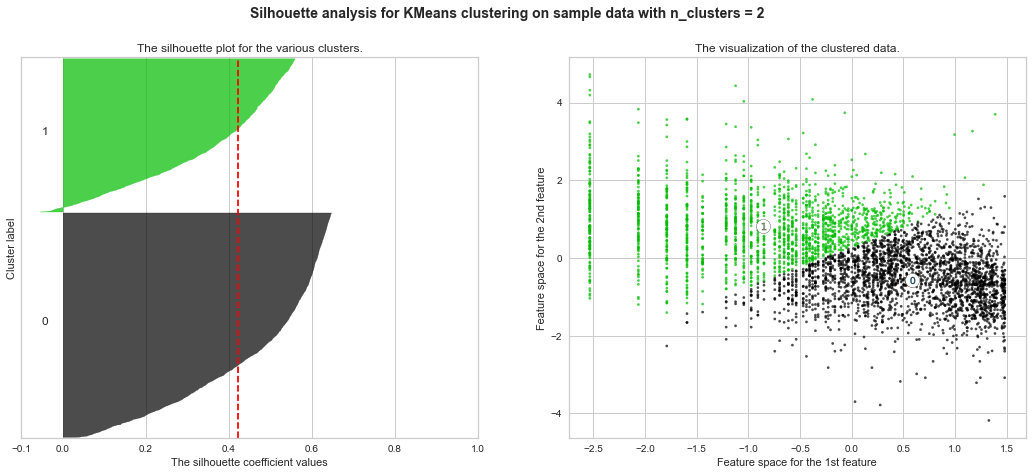

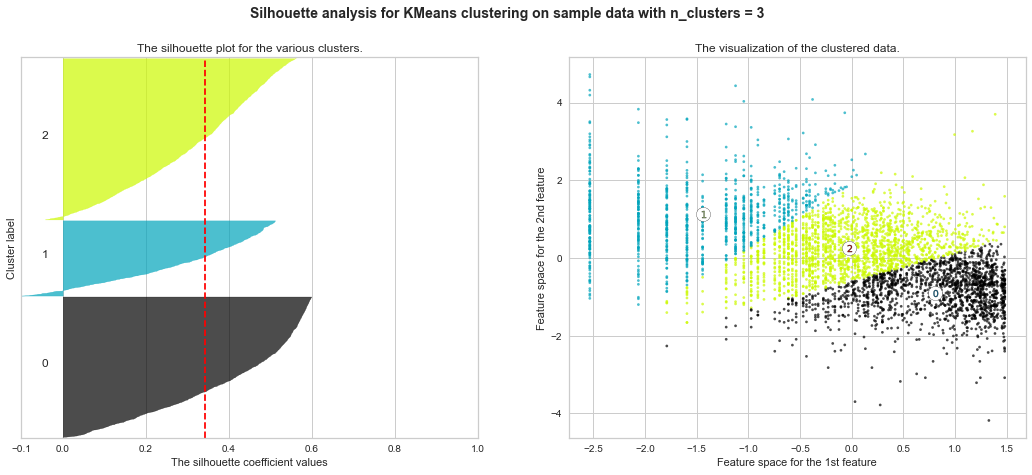

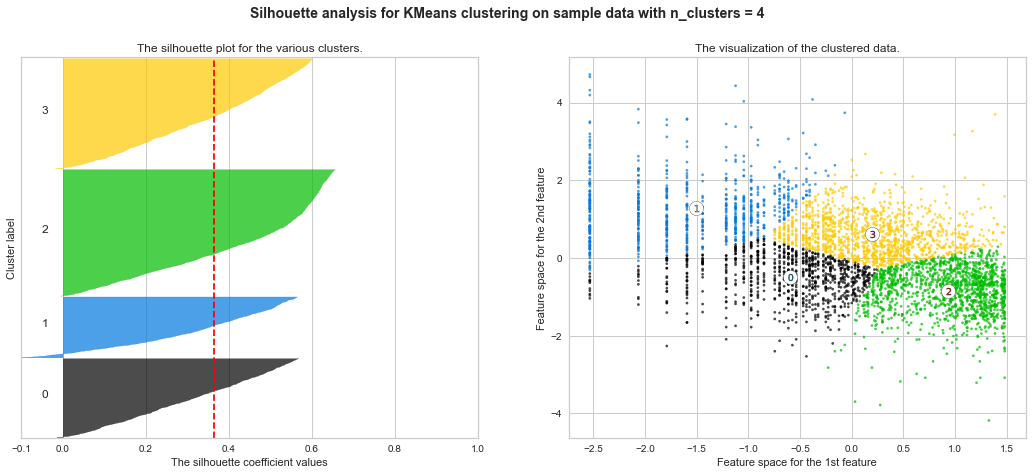

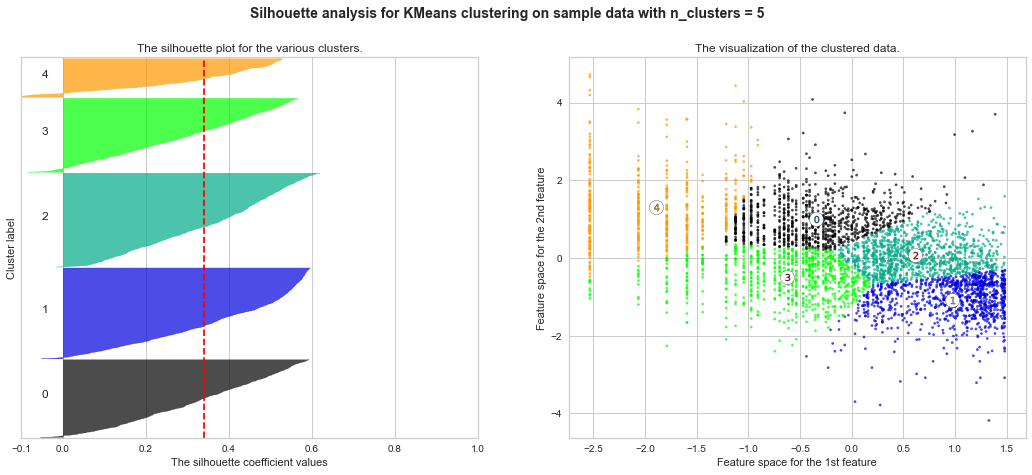

In [90]:
#import collection of color maps
import matplotlib.cm as cm

range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### **Observations**

- We got good Silhouette plot for Cluster-2 but still few datapoints are on the negative side of the Silhouette Coefficient value as shown in below figure. but its better than others.

**So giving n_clusters=2 on Kmeans Model.**

In [91]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [92]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,2,2,1,221,5,Platinaum,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1
12352.0,36,85,2506.04,2,2,1,221,5,Platinaum,3.583519,4.442651,7.826459,0
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,1
12355.0,214,13,459.40,4,4,3,443,11,Bronz,5.365976,2.564949,6.129921,1


In [93]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[-0.85183281,  0.83197381],
       [ 0.58210228, -0.56853158]])

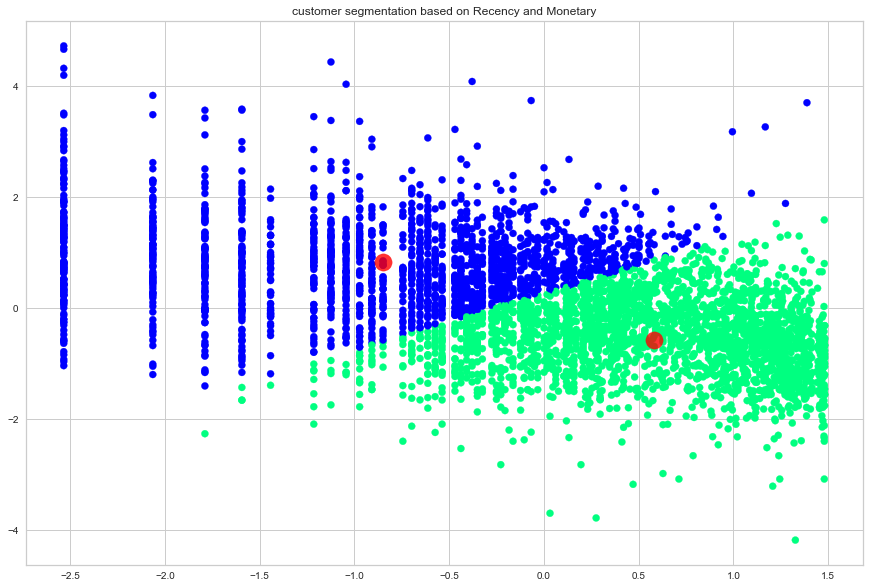

In [94]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8);

##   **2) DBSCAN Algorithm on Recency and Monetary**
(Density-Based Spatial Clustering of Applications with Noise)

In [95]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [96]:
#eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 76
Silhouette Coefficient: 0.405


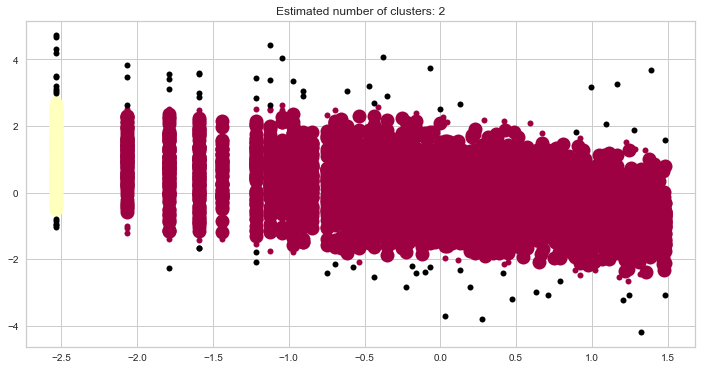

In [97]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

The plot shows the estimated clusters as well as the noise points. The clusters are represented by different colors, and the noise points are shown in black. This plot is to understand the distribution of the data points in the feature space and how they are grouped into clusters.

### Frequency and Monetary

## **1)KMeans Clustering**

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

**A)  Applying Elbow Method on Frequency and Monetary.**

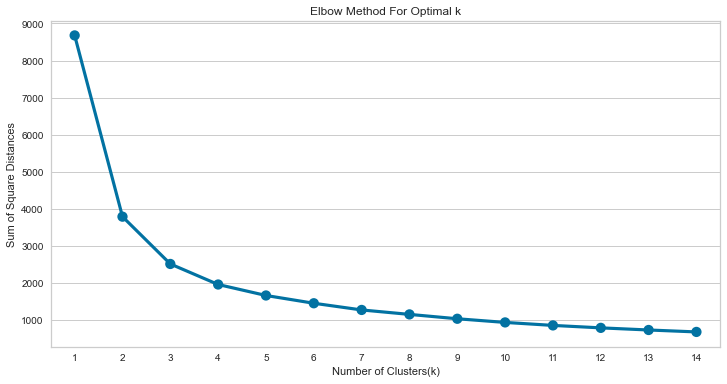

In [98]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Here we can see that Optimal value for cluster came out to be 2.**

### **Cross verifying with ElbowVisualizar**

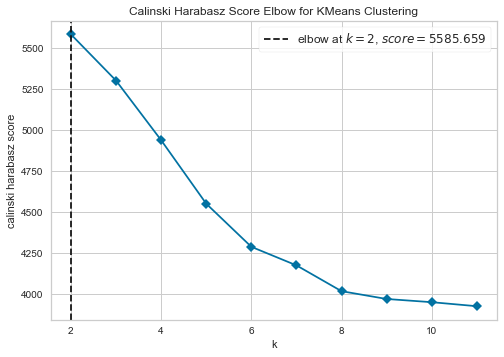

In [99]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

Elbow Visulaizer also giving cluster=2

**Silhouette Score** **(Validating Above optimal cluster value(i.e optimal_cluster=2)**

In [100]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.3715810384601166
For n_clusters = 5, silhouette score is 0.3442965607959301
For n_clusters = 6, silhouette score is 0.3586829219947334
For n_clusters = 7, silhouette score is 0.34342098057749704
For n_clusters = 8, silhouette score is 0.3500546906243836
For n_clusters = 9, silhouette score is 0.34419928062567495
For n_clusters = 10, silhouette score is 0.36238664926507114
For n_clusters = 11, silhouette score is 0.3682455762844025
For n_clusters = 12, silhouette score is 0.3534862139672636
For n_clusters = 13, silhouette score is 0.36139542577471895
For n_clusters = 14, silhouette score is 0.3486849890768239
For n_clusters = 15, silhouette score is 0.3628225939841498


**Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)**

For n_clusters = 2 The average silhouette_score is : 0.478535709506603
For n_clusters = 3 The average silhouette_score is : 0.40764120562174455
For n_clusters = 4 The average silhouette_score is : 0.3715810384601166
For n_clusters = 5 The average silhouette_score is : 0.3442965607959301


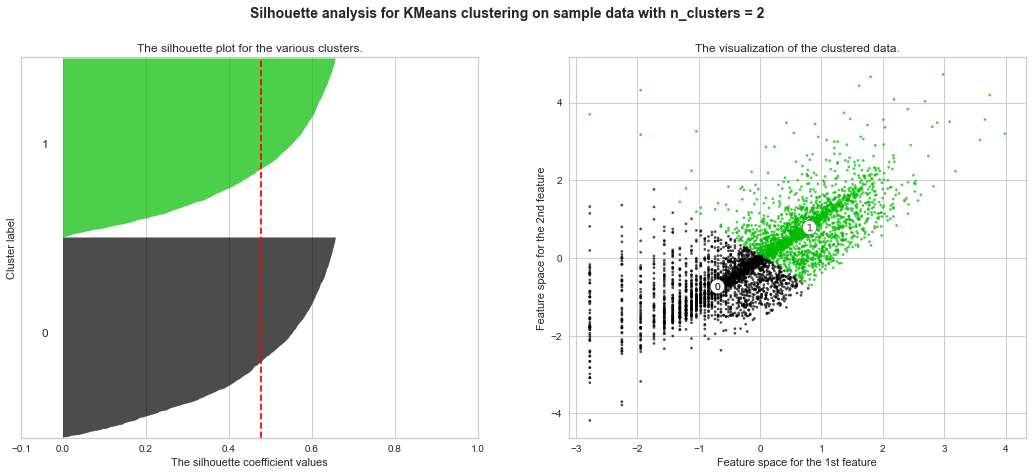

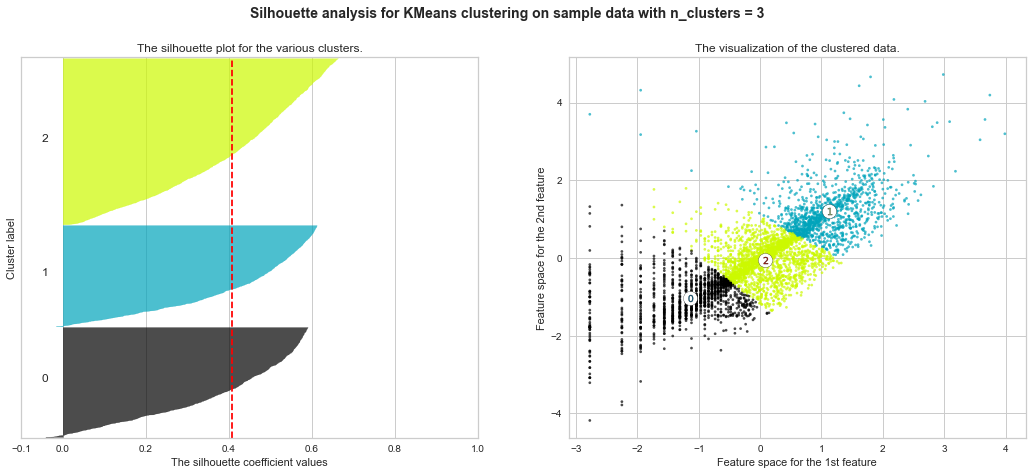

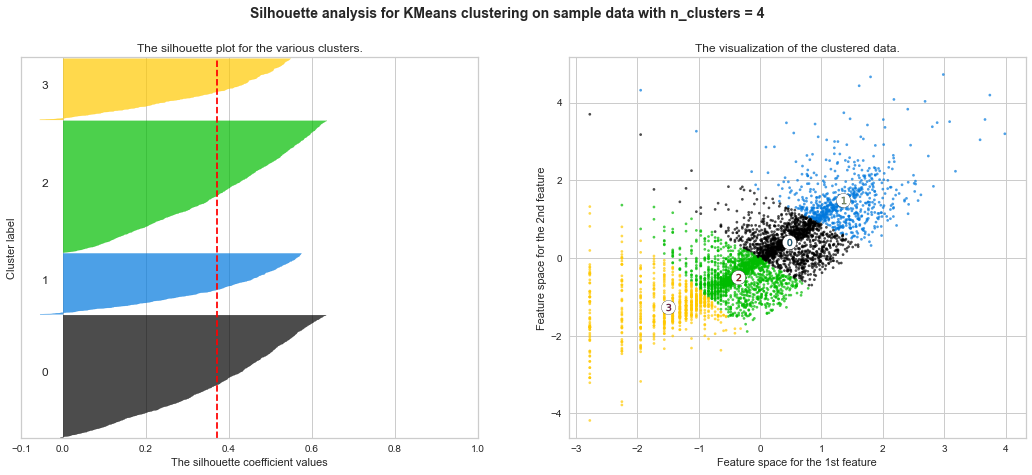

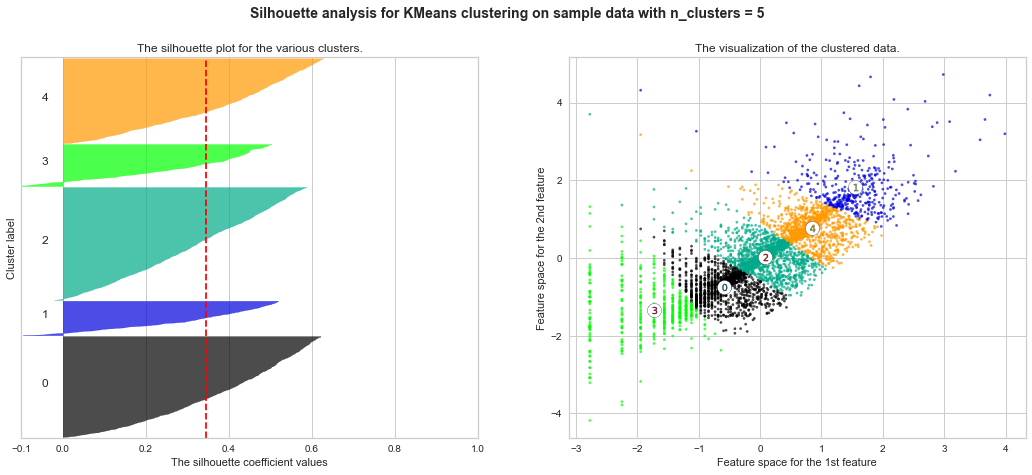

In [101]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


**So giving n_clusters=2 on Kmeans Model.**

In [102]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [103]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_on_freq_mon
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,0,1
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693,0,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinaum,2.890372,4.290459,7.471676,0,1
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1,0
12352.0,36,85,2506.04,2,2,1,221,5,Platinaum,3.583519,4.442651,7.826459,0,1
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,1,0
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,1,1
12355.0,214,13,459.40,4,4,3,443,11,Bronz,5.365976,2.564949,6.129921,1,0


In [104]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[-0.70675195, -0.71366469],
       [ 0.78880412,  0.79651943]])

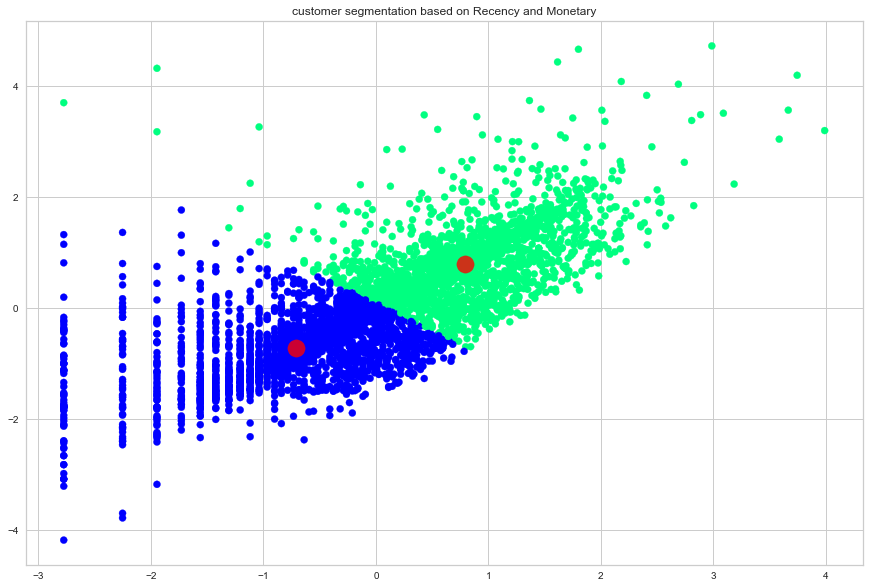

In [105]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

## **2) DBSCAN Algorithm on Frequency and Monetary**

In [106]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 47
Silhouette Coefficient: 0.426


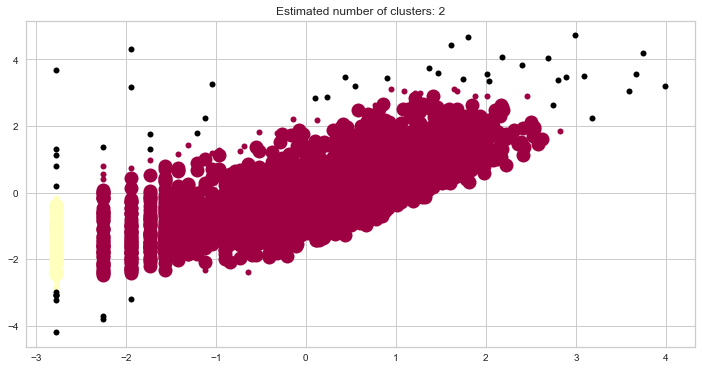

In [107]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

## Recency,Frequency and Monetary

## **1) KMeans Clustering**

**Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.**

**A) Applying Elbow Method on Recency, Frequency and Monetary.**

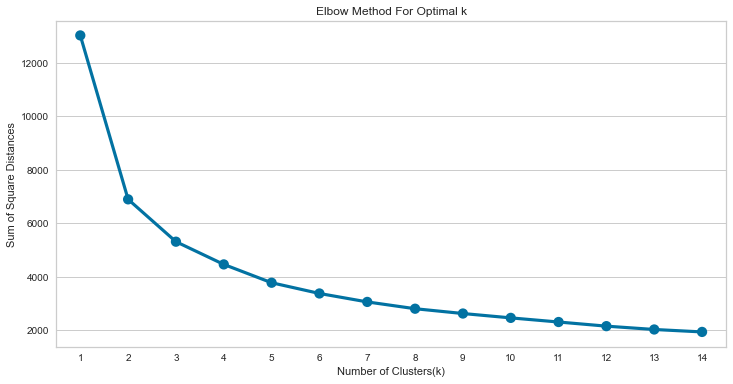

In [108]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Here we can see that Optimal value for cluster came out to be 2.

### Cross verifying with ElbowVisualizar

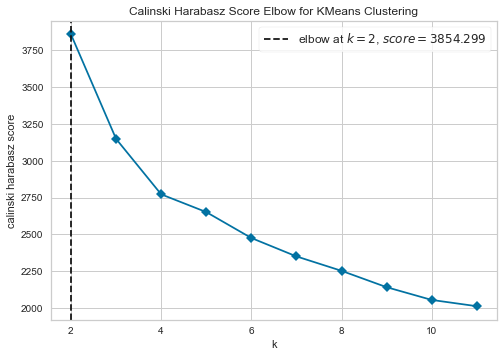

In [109]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

Elbow Visulaizer also giving cluster=2

### Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)

In [110]:
# taking Recency_log,Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39597280345877467
For n_clusters = 3, silhouette score is 0.30306623428198437
For n_clusters = 4, silhouette score is 0.30188282895683416
For n_clusters = 5, silhouette score is 0.2787783127811271
For n_clusters = 6, silhouette score is 0.2789560652501828
For n_clusters = 7, silhouette score is 0.26251570956441783
For n_clusters = 8, silhouette score is 0.26604516508252274
For n_clusters = 9, silhouette score is 0.25334399829461035
For n_clusters = 10, silhouette score is 0.2594507943913136
For n_clusters = 11, silhouette score is 0.261084644577631
For n_clusters = 12, silhouette score is 0.2630954807140074
For n_clusters = 13, silhouette score is 0.2629821003752366
For n_clusters = 14, silhouette score is 0.26165526187324323
For n_clusters = 15, silhouette score is 0.2561927031281945


**Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)**

For n_clusters = 2 The average silhouette_score is : 0.39597280345877467
For n_clusters = 3 The average silhouette_score is : 0.30306623428198437
For n_clusters = 4 The average silhouette_score is : 0.30188282895683416
For n_clusters = 5 The average silhouette_score is : 0.2787783127811271


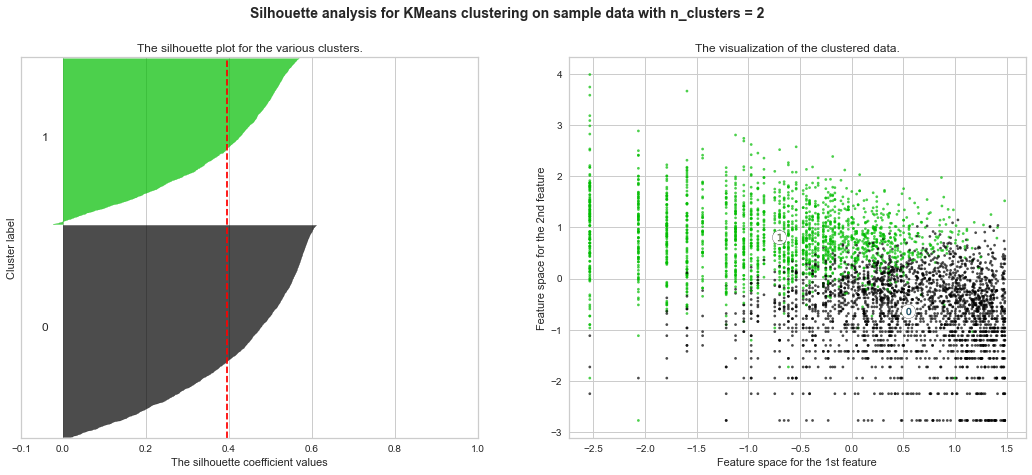

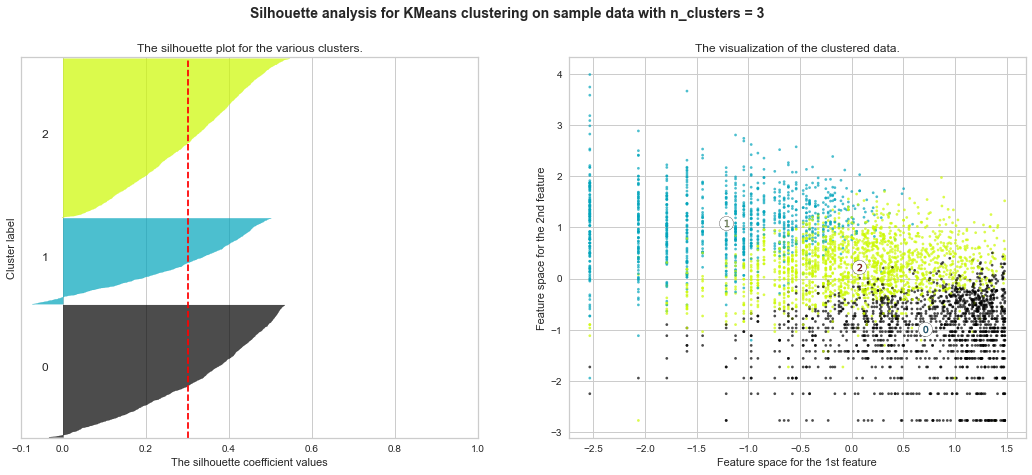

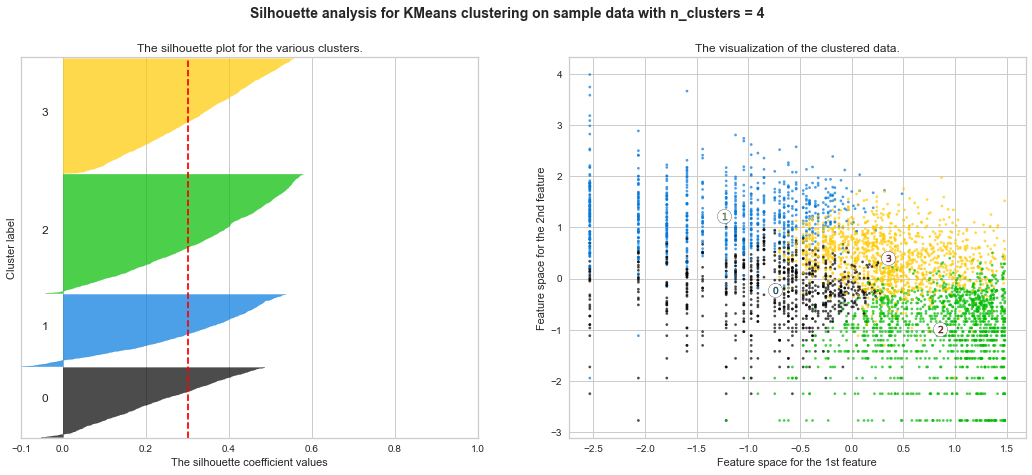

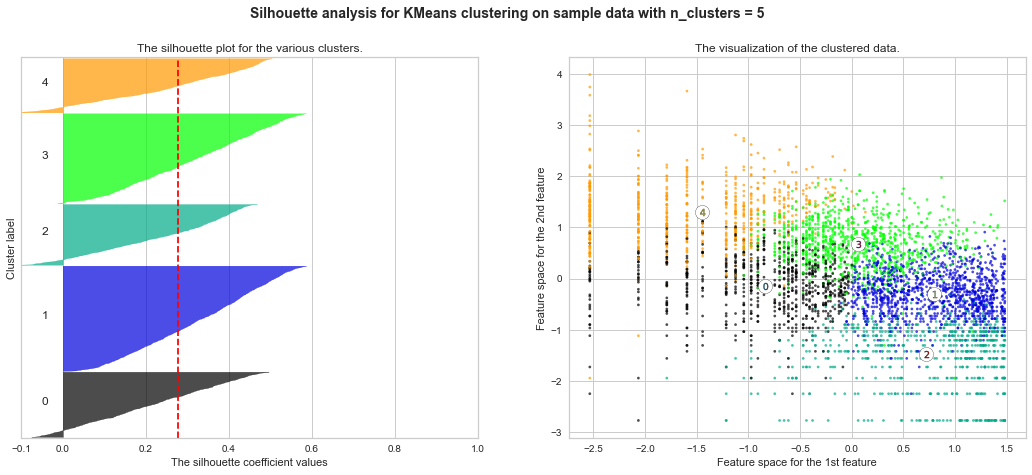

In [111]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* **Silhouette Plot for Frequency and Monetary with cluster=2 is good.**
* **Still Few datapoints are on the negative side of the Silhouette Coefficent values(see below image). Still we can consider the clusters**
`

**So giving n_clusters=2 on Kmeans Model**

In [115]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [116]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_on_freq_mon,Cluster_based_on_freq_mon_rec
CustomerID,,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,0,1,0
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693,0,1,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0,1,0
12349.0,18,73,1757.55,2,2,1,221,5,Platinaum,2.890372,4.290459,7.471676,0,1,1
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1,0,0
12352.0,36,85,2506.04,2,2,1,221,5,Platinaum,3.583519,4.442651,7.826459,0,1,1
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,1,0,0
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,1,1,0
12355.0,214,13,459.40,4,4,3,443,11,Bronz,5.365976,2.564949,6.129921,1,0,0


In [117]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[ 0.54960385, -0.63997055, -0.64228902],
       [-0.69022012,  0.80370717,  0.80661881]])

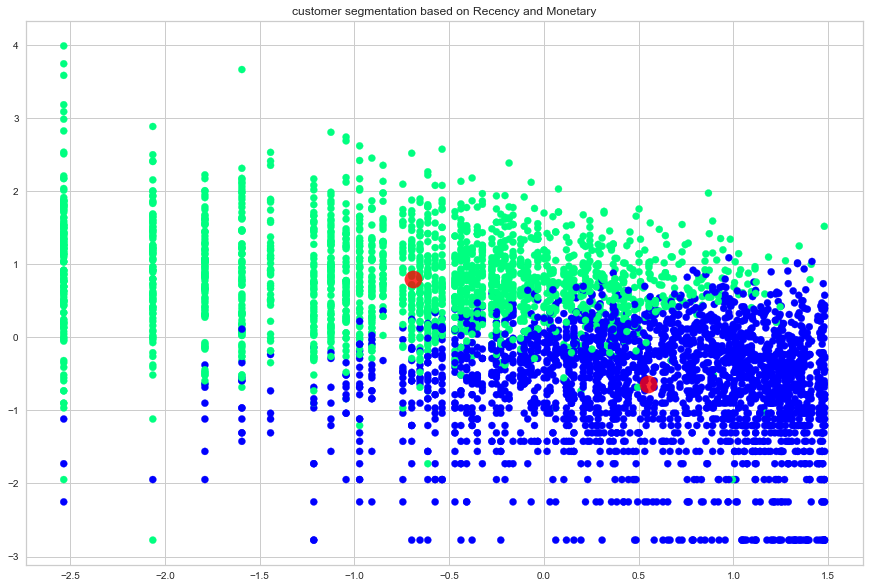

In [118]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8);

## 2) DBSCAN Algorithm on Recency,Frequency and Monetary

In [119]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 139
Silhouette Coefficient: 0.285


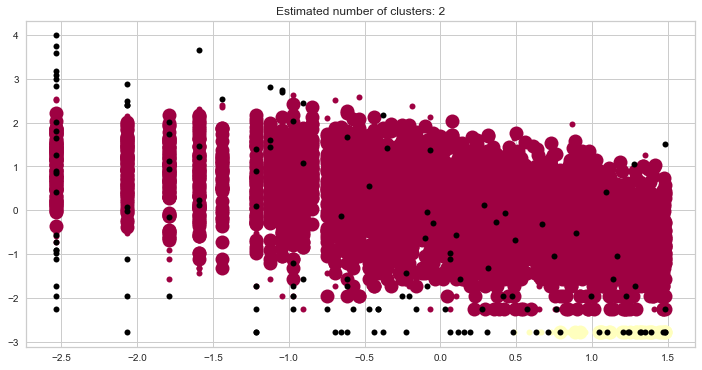

In [130]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

## Hierarchical Clustering

###  How should we Choose the Number of Clusters in Hierarchical Clustering? 

- A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters. 

- We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line). 

In [121]:
import scipy.cluster.hierarchy as sch

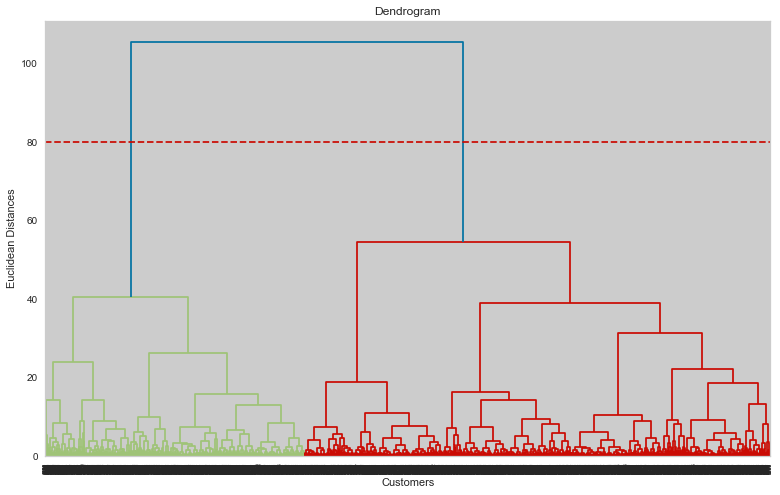

In [122]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

**No. of Cluster  = 2**

In [123]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

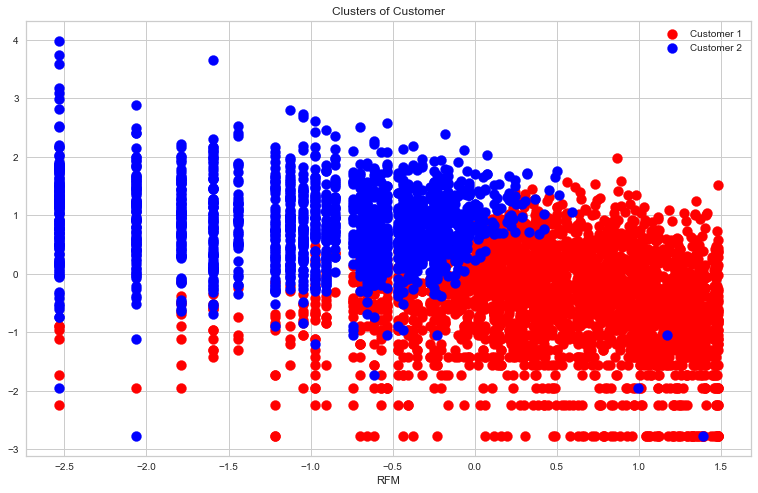

In [124]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [125]:
rfm_dataframe.head(1)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_on_freq_mon,Cluster_based_on_freq_mon_rec
CustomerID,,,,,,,,,,,,,,,
12346.0,325,1,77183.6,4,4,1,441,9,Silver,5.783825,0.0,11.253942,0,1,0


In [126]:
data_process_normalized=rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon_rec']]

In [127]:
mla =data_process_normalized.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})
mla

Recency            Frequency            \
                                     mean min  max        mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                              140.772671   1  373   24.937474   1   168   
1                               30.901196   1  372  175.590224   1  7847   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                               470.351098    3.75   77183.60  2415  
1                              4043.426938  161.03  280206.02  1923

# **Summary And Conclusion of project**

### Firstly we did clustering based on RFM analysis. We had 4 clusters/Segmentation of customers based on RFM score.

In [128]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           19.412510   0  140  228.559778  20  7847  5255.277617   
Gold                63.376133   0  372   57.959970   1   543  1169.031202   
Silver             126.029562   1  373   24.503568   1    99   583.936944   
Bronz              217.261039  51  373   10.955844   1    41   199.159506   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          360.93  280206.02  1263  
Gold               114.34  168472.50  1324  
Silver               6.90   77183.60   981  
Bronz                3.75     660.00   770

  * Platinum customers=1263 ( less recency but high  frequency and heavy spendings)
  * Gold customers=1324 (good recency,frequncy and moentary)
  * Silver customers=981(high recency, low frequency and low spendings)
  * Bronz customers=770 (very high recency but very less frequency and spendings)

**Later we implemented the machine learning algorithms to cluster the customers.**

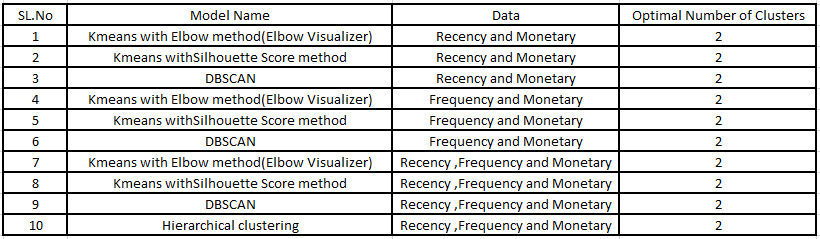

In [129]:
mla

Recency            Frequency            \
                                     mean min  max        mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                              140.772671   1  373   24.937474   1   168   
1                               30.901196   1  372  175.590224   1  7847   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                               470.351098    3.75   77183.60  2415  
1                              4043.426938  161.03  280206.02  1923

* **Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.**

* **Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2414 customers.**
* **Cluster 1 has low recency rate but they are frequent buyers and spends  very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business**

# Thank You